In [11]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params
import numpy as np
from impulse.impulse import sample, parallel_sample, pt_sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time
import emcee

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Do not have acor package


In [2]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [3]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [8]:
x0 = np.array(list(sample_params(pta.params).values()))

In [10]:
res = sample(pta.get_lnlikelihood, pta.get_lnprior, len(x0), x0, num_samples=1_000_000)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
100%|██████████| 1000/1000 [02:58<00:00,  5.59it/s]


In [12]:
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [13]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50, )

Finished 1.00 percent in 2.036206 s Acceptance rate = 0.365456Adding DE jump with weight 50
Finished 99.90 percent in 175.722410 s Acceptance rate = 0.209965
Run Complete


In [14]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

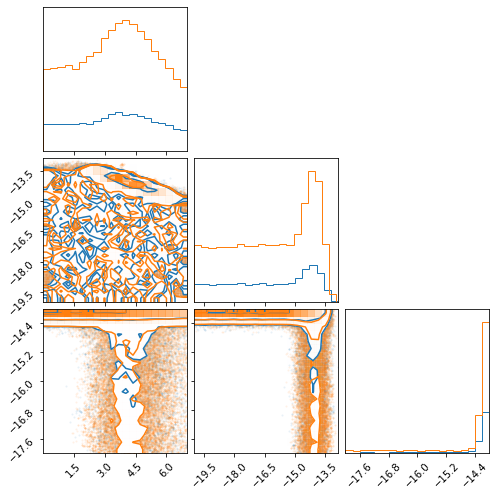

In [24]:
corner.corner(chain2[:, :3], hist2d_kwargs={'density':True}, fig=thing, color='C1', kwargs={"density":True})

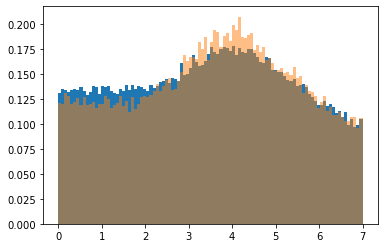

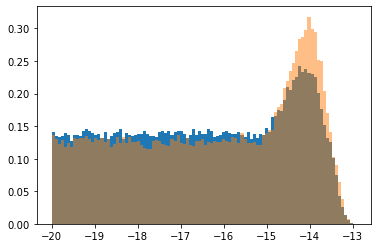

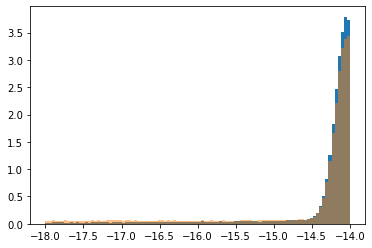

In [15]:
for ii in range(3):
    __, bins, __ = plt.hist(np.vstack(res)[:, ii], bins=100, density=True)
    plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
    # plt.hist(samples[:, ii], bins=bins, density=True, alpha=0.5)
    plt.show()

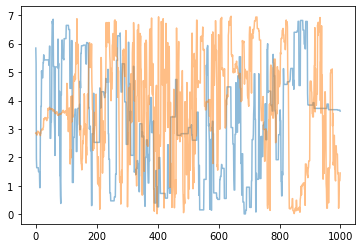

In [23]:
plt.plot(res[20_000:21_000, 0], alpha=0.5)
plt.plot(chain2[:1000, 0], alpha=0.5)

In [52]:
ii = 2
print(integrated_time(chain2[:, ii]))
print(integrated_time(res[:, ii, 0], quiet=True) / 10)
print(integrated_time(samples[:, ii], quiet=True))

[22.94130901]
[26.15608439]
[1.09246932]


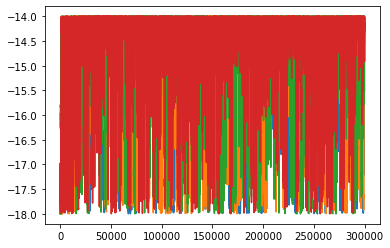

In [38]:
plt.plot(res[0][:, 2])
plt.plot(res[1][:, 2])
plt.plot(res[2][:, 2])
plt.plot(res[3][:, 2])

In [7]:
ndim = 136
tstep = 1 + np.sqrt(2 / ndim)

In [10]:
ntemps = 4

In [11]:
tmin = 1

In [23]:
ii = np.arange(ntemps)
ladder = tmin * tstep**ii

In [24]:
res = sample(pta.get_lnprior, lambda x: 0, len(x0), x0, num_samples=1_000_000)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
100%|██████████| 1000/1000 [01:23<00:00, 12.04it/s]


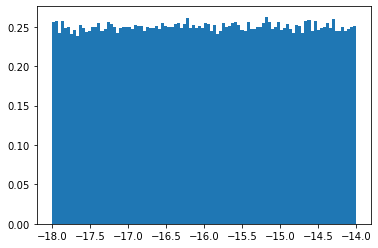

In [37]:
plt.hist(res[:, 2], bins=100, density=True)
plt.show()

In [58]:
mean = [3, 5]
cov = [[3, 4], [4, 20]]

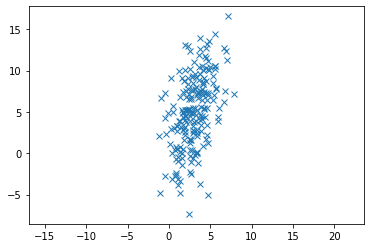

In [64]:
import matplotlib.pyplot as plt

x, y = np.random.multivariate_normal(mean, cov, 200).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [61]:
from scipy.stats import multivariate_normal

In [43]:
f = multivariate_normal(x, [1, 2], [2, 1])

In [41]:
x = np.linspace(0, 7, num=2000)